In [4]:
import pandas as pd

In [5]:
data = pd.read_csv('/content/Tamil_first_ready_for_sentiment.csv',on_bad_lines='skip',sep ='\t',names=['Sentiment','Text'])

In [6]:
data

,Sentiment,Text
0,Negative,Enna da ellam avan seyal Mari iruku
1,Negative,This movei is just like ellam avan seyal
2,Positive,Padam vanthathum 13k dislike pottavaga yellam...
3,Positive,Neraya neraya neraya... ... V era level...thala
4,Positive,wow thavala sema mass....padam oru pundaikum ...
...,...,...
15739,Mixed_feelings,ivaru cinemala laam nalla tha prasuraaru...aa...
15740,Positive,Pattaya Kilaputhupaa trailer... !!!!! Get Raj...
15741,Mixed_feelings,En innum trending la varala? Ennada panringa ...
15742,not-Tamil,Rajnikant sir plz aap india ke pm ban jaao


In [7]:
data['Sentiment'].value_counts()

Positive           10559
Negative            2037
Mixed_feelings      1801
unknown_state        850
not-Tamil            497
Name: Sentiment, dtype: int64

In [8]:
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import re
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [9]:
wnl=WordNetLemmatizer()
corpus=[]

In [10]:
for i in range(len(data)):
  review=re.sub('[^a-zA-Z]',' ',data['Text'][i])
  review=review.lower()
  review=review.split()
  review=[wnl.lemmatize(word) for word in review if not word in stopwords.words('english')]
  review=' '.join(review)
  corpus.append(review)

In [11]:
data['clean_text'] = corpus

In [12]:
data

,Sentiment,Text,clean_text
0,Negative,Enna da ellam avan seyal Mari iruku,enna da ellam avan seyal mari iruku
1,Negative,This movei is just like ellam avan seyal,movei like ellam avan seyal
2,Positive,Padam vanthathum 13k dislike pottavaga yellam...,padam vanthathum k dislike pottavaga yellam ye...
3,Positive,Neraya neraya neraya... ... V era level...thala,neraya neraya neraya v era level thala
4,Positive,wow thavala sema mass....padam oru pundaikum ...,wow thavala sema mass padam oru pundaikum aagathu
...,...,...,...
15739,Mixed_feelings,ivaru cinemala laam nalla tha prasuraaru...aa...,ivaru cinemala laam nalla tha prasuraaru aana ...
15740,Positive,Pattaya Kilaputhupaa trailer... !!!!! Get Raj...,pattaya kilaputhupaa trailer get rajnified
15741,Mixed_feelings,En innum trending la varala? Ennada panringa ...,en innum trending la varala ennada panringa yo...
15742,not-Tamil,Rajnikant sir plz aap india ke pm ban jaao,rajnikant sir plz aap india ke pm ban jaao


In [15]:
from wordcloud import WordCloud

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
data['Sentiment'].value_counts()

Positive           10559
Negative            2037
Mixed_feelings      1801
unknown_state        850
not-Tamil            497
Name: Sentiment, dtype: int64

In [18]:
data.head()

,Sentiment,Text,clean_text
0,Negative,Enna da ellam avan seyal Mari iruku,enna da ellam avan seyal mari iruku
1,Negative,This movei is just like ellam avan seyal,movei like ellam avan seyal
2,Positive,Padam vanthathum 13k dislike pottavaga yellam...,padam vanthathum k dislike pottavaga yellam ye...
3,Positive,Neraya neraya neraya... ... V era level...thala,neraya neraya neraya v era level thala
4,Positive,wow thavala sema mass....padam oru pundaikum ...,wow thavala sema mass padam oru pundaikum aagathu


In [19]:
data.head(2)

,Sentiment,Text,clean_text
0,Negative,Enna da ellam avan seyal Mari iruku,enna da ellam avan seyal mari iruku
1,Negative,This movei is just like ellam avan seyal,movei like ellam avan seyal


In [20]:
data.columns

Index(['Sentiment', 'Text', 'clean_text'], dtype='object')

In [21]:
for i in data['Sentiment']:
  print(i)
  break

Negative 


In [22]:
data['Sentiment']=='Negative '

0         True
1         True
2        False
3        False
4        False
         ...  
15739    False
15740    False
15741    False
15742    False
15743    False
Name: Sentiment, Length: 15744, dtype: bool

In [23]:
df = data.loc[(data['Sentiment'] == 'Negative ') | (data['Sentiment'] == 'Positive ')]

In [24]:
df

,Sentiment,Text,clean_text
0,Negative,Enna da ellam avan seyal Mari iruku,enna da ellam avan seyal mari iruku
1,Negative,This movei is just like ellam avan seyal,movei like ellam avan seyal
2,Positive,Padam vanthathum 13k dislike pottavaga yellam...,padam vanthathum k dislike pottavaga yellam ye...
3,Positive,Neraya neraya neraya... ... V era level...thala,neraya neraya neraya v era level thala
4,Positive,wow thavala sema mass....padam oru pundaikum ...,wow thavala sema mass padam oru pundaikum aagathu
...,...,...,...
15732,Positive,Looking young rajini Anna Fans from Telangana,looking young rajini anna fan telangana
15733,Positive,Nee vaa thalaivaa ponggalukku naaga erukko,nee vaa thalaivaa ponggalukku naaga erukko
15735,Positive,Rajini sir god of Indian cenima thalivaaaaaa ...,rajini sir god indian cenima thalivaaaaaa super
15738,Positive,Again 1990 rajni sir cute look,rajni sir cute look


In [25]:
df['word_count']=df['clean_text'].apply(lambda x:len(str(x).split(" ")))
df['char_count']=df['clean_text'].apply(lambda x: sum(len(word) for word in str(x).split(" ")))
df['sentence_count']=df['clean_text'].apply(lambda x: len(str(x).split(".")))
df['average_word_length']=df['char_count']/df['word_count']
df['avg_sentence_length']=df['word_count']/df['sentence_count']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Average Sentence Length')

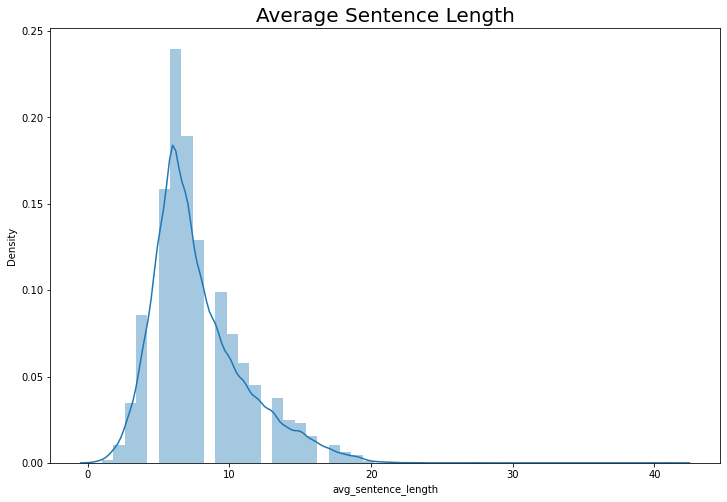

In [29]:
plt.figure(figsize=(12,8))
sns.distplot(df['avg_sentence_length'])
plt.title("Average Sentence Length",fontsize=20)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Average Word Length')

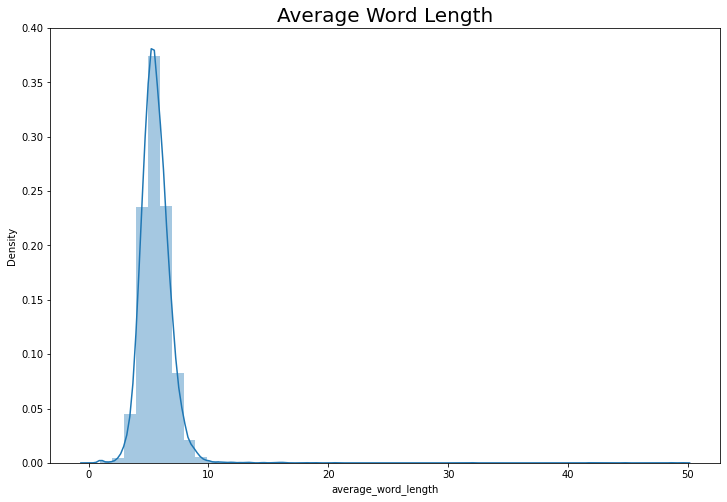

In [30]:
plt.figure(figsize=(12,8))
sns.distplot(df['average_word_length'])
plt.title("Average Word Length",fontsize=20)

In [31]:
df

,Sentiment,Text,clean_text,word_count,char_count,sentence_count,average_word_length,avg_sentence_length
0,Negative,Enna da ellam avan seyal Mari iruku,enna da ellam avan seyal mari iruku,7,29,1,4.142857,7.0
1,Negative,This movei is just like ellam avan seyal,movei like ellam avan seyal,5,23,1,4.600000,5.0
2,Positive,Padam vanthathum 13k dislike pottavaga yellam...,padam vanthathum k dislike pottavaga yellam ye...,13,70,1,5.384615,13.0
3,Positive,Neraya neraya neraya... ... V era level...thala,neraya neraya neraya v era level thala,7,32,1,4.571429,7.0
4,Positive,wow thavala sema mass....padam oru pundaikum ...,wow thavala sema mass padam oru pundaikum aagathu,8,42,1,5.250000,8.0
...,...,...,...,...,...,...,...,...
15732,Positive,Looking young rajini Anna Fans from Telangana,looking young rajini anna fan telangana,6,34,1,5.666667,6.0
15733,Positive,Nee vaa thalaivaa ponggalukku naaga erukko,nee vaa thalaivaa ponggalukku naaga erukko,6,37,1,6.166667,6.0
15735,Positive,Rajini sir god of Indian cenima thalivaaaaaa ...,rajini sir god indian cenima thalivaaaaaa super,7,41,1,5.857143,7.0
15738,Positive,Again 1990 rajni sir cute look,rajni sir cute look,4,16,1,4.000000,4.0


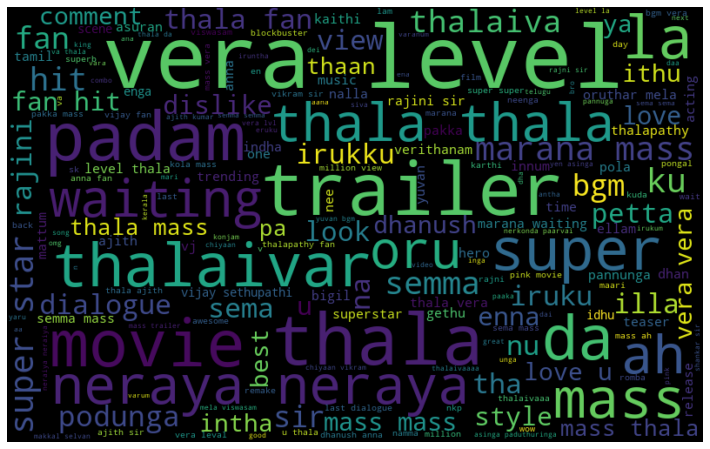

In [32]:
from wordcloud import WordCloud
all_words = " ".join([sentence for sentence in df['clean_text'][df['Sentiment']=='Positive ']])

wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

# plot the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

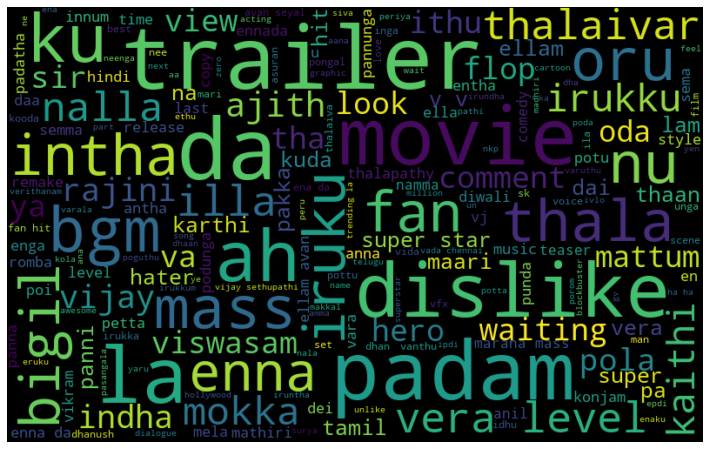

In [33]:
from wordcloud import WordCloud
all_words = " ".join([sentence for sentence in df['clean_text'][df['Sentiment']=='Negative ']])

wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

# plot the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [34]:
df

,Sentiment,Text,clean_text,word_count,char_count,sentence_count,average_word_length,avg_sentence_length
0,Negative,Enna da ellam avan seyal Mari iruku,enna da ellam avan seyal mari iruku,7,29,1,4.142857,7.0
1,Negative,This movei is just like ellam avan seyal,movei like ellam avan seyal,5,23,1,4.600000,5.0
2,Positive,Padam vanthathum 13k dislike pottavaga yellam...,padam vanthathum k dislike pottavaga yellam ye...,13,70,1,5.384615,13.0
3,Positive,Neraya neraya neraya... ... V era level...thala,neraya neraya neraya v era level thala,7,32,1,4.571429,7.0
4,Positive,wow thavala sema mass....padam oru pundaikum ...,wow thavala sema mass padam oru pundaikum aagathu,8,42,1,5.250000,8.0
...,...,...,...,...,...,...,...,...
15732,Positive,Looking young rajini Anna Fans from Telangana,looking young rajini anna fan telangana,6,34,1,5.666667,6.0
15733,Positive,Nee vaa thalaivaa ponggalukku naaga erukko,nee vaa thalaivaa ponggalukku naaga erukko,6,37,1,6.166667,6.0
15735,Positive,Rajini sir god of Indian cenima thalivaaaaaa ...,rajini sir god indian cenima thalivaaaaaa super,7,41,1,5.857143,7.0
15738,Positive,Again 1990 rajni sir cute look,rajni sir cute look,4,16,1,4.000000,4.0


In [35]:
df['Sentiment'].value_counts()

Positive     10559
Negative      2037
Name: Sentiment, dtype: int64

In [36]:
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([    0.,  2000.,  4000.,  6000.,  8000., 10000., 12000.]),
 <a list of 7 Text major ticklabel objects>)

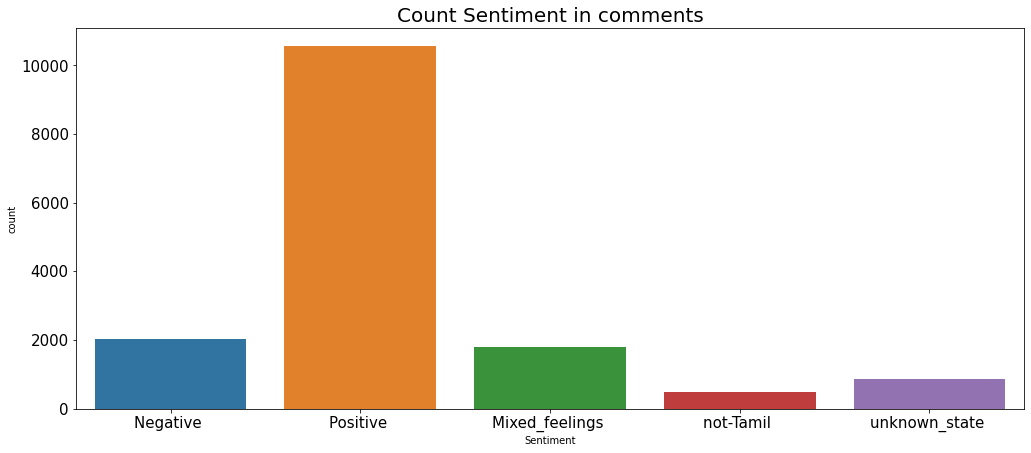

In [37]:
plt.figure(figsize=(17,7))
sns.countplot(data['Sentiment'])
plt.title("Count Sentiment in comments",fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([    0.,  2000.,  4000.,  6000.,  8000., 10000., 12000.]),
 <a list of 7 Text major ticklabel objects>)

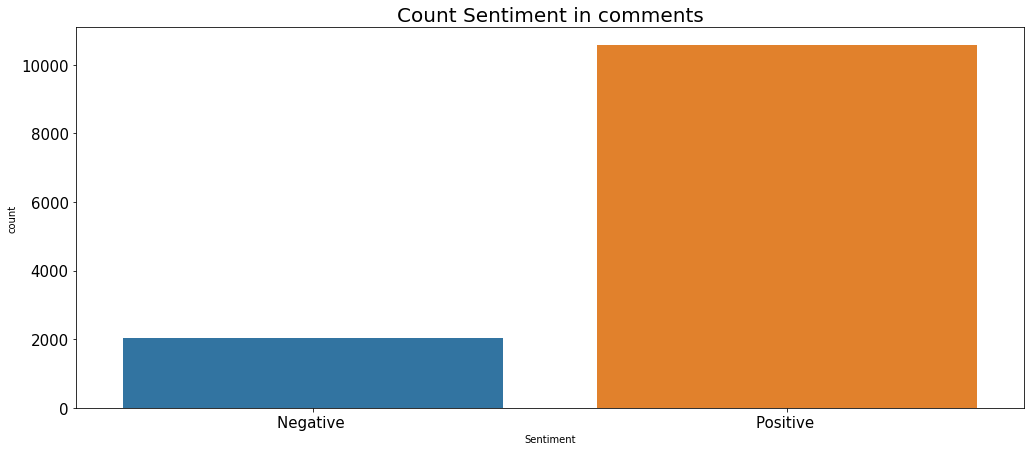

In [38]:
plt.figure(figsize=(17,7))
sns.countplot(df['Sentiment'])
plt.title("Count Sentiment in comments",fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

In [39]:
df['Sentiment']=df['Sentiment'].replace({'Negative ':0,'Positive ':1})

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [40]:
df['Sentiment'].value_counts()

1    10559
0     2037
Name: Sentiment, dtype: int64

In [41]:
df.head(2)

,Sentiment,Text,clean_text,word_count,char_count,sentence_count,average_word_length,avg_sentence_length
0,0,Enna da ellam avan seyal Mari iruku,enna da ellam avan seyal mari iruku,7,29,1,4.142857,7.0
1,0,This movei is just like ellam avan seyal,movei like ellam avan seyal,5,23,1,4.600000,5.0


In [42]:
df.shape

(12596, 8)

In [43]:
maxl=max([len(s) for s in df['clean_text']])
maxl

513

In [44]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
vectorizer = CountVectorizer(analyzer = "word", 
                             preprocessor = None, 
                             stop_words =  'english', 
                             max_features = 10000,lowercase=True)
df_features = vectorizer.fit_transform(df['clean_text'])
tfidf_transformer = TfidfTransformer()
df_features_tfidf = tfidf_transformer.fit_transform(df_features)
df_mat = df_features_tfidf.toarray()

In [45]:
df_mat.shape

(12596, 10000)

In [46]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf = TfidfVectorizer()

In [47]:
a=tf.fit_transform(df['clean_text'])

In [48]:
a

<12596x18595 sparse matrix of type '<class 'numpy.float64'>'
	with 91389 stored elements in Compressed Sparse Row format>

In [49]:
XX = a.todense()

In [50]:
XX[0:1]

matrix([[0., 0., 0., ..., 0., 0., 0.]])

In [51]:
XX.shape

(12596, 18595)

In [52]:
from sklearn.model_selection import train_test_split

In [53]:
X_new = XX

In [54]:
y_new = df['Sentiment'] 

In [55]:
X_train,X_test,y_train,y_test=train_test_split(XX,df['Sentiment'],test_size=0.3,random_state=42)

In [56]:
max([len(w) for w in df['clean_text']])

513

In [57]:
from sklearn.ensemble import RandomForestClassifier

In [58]:
rf=RandomForestClassifier()
rf.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


RandomForestClassifier()

In [59]:
rf.score(X_test,y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


0.8454617623709976

In [60]:
from sklearn.model_selection import RandomizedSearchCV

In [61]:
from lightgbm import LGBMClassifier

In [62]:
LGB=LGBMClassifier()
LGB.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


LGBMClassifier()

In [63]:
LGB.get_params()

{'boosting_type': 'gbdt',
 'class_weight': None,
 'colsample_bytree': 1.0,
 'importance_type': 'split',
 'learning_rate': 0.1,
 'max_depth': -1,
 'min_child_samples': 20,
 'min_child_weight': 0.001,
 'min_split_gain': 0.0,
 'n_estimators': 100,
 'n_jobs': -1,
 'num_leaves': 31,
 'objective': None,
 'random_state': None,
 'reg_alpha': 0.0,
 'reg_lambda': 0.0,
 'silent': True,
 'subsample': 1.0,
 'subsample_for_bin': 200000,
 'subsample_freq': 0}

In [64]:
param={
    'boosting_type': ['gbdt','dart'],
    'n_estimators':[100,500],
    'importance_type': ['split','gain'],
}

In [65]:
GRID = RandomizedSearchCV(estimator=LGB,scoring='accuracy',param_distributions=param,cv=5)

In [68]:
import warnings
warnings.filterwarnings('ignore')

In [69]:
GRID.fit(X_train,y_train)

RandomizedSearchCV(cv=5, estimator=LGBMClassifier(),
                   param_distributions={'boosting_type': ['gbdt', 'dart'],
                                        'importance_type': ['split', 'gain'],
                                        'n_estimators': [100, 500]},
                   scoring='accuracy')

In [70]:
GRID.best_score_

0.8369053085405082

In [71]:
GRID.best_params_

{'n_estimators': 100, 'importance_type': 'split', 'boosting_type': 'dart'}